## Task1

### Point 1

What is the conditional distribution of X, the number of samples containing Giardia cysts, given θ?

Conditional distribution of $X$ given $\Theta$ is defined as follows:
$$
f_{X \mid \Theta}(x\mid\theta)
$$
Assuming that $\theta$ is already given, we can define the conditional distribution of $X$ as a Binomial ditribution $Bin(n=116, x)$. The PDF is defined as follows:

$$
f_{X \mid \Theta}(x\mid\theta) = {n \choose x} \cdot \theta^x (1-\theta)^{n-x}\\
or\\
f_{X \mid \Theta}(x\mid\theta) = {116 \choose x} \cdot \theta^x (1-\theta)^{116-x}
$$



### Point 2

Given that the **expected value** of θ is 0.2 and a **standard deviation** of 0.16. Determine the parameters α and β of a Beta prior distribution for θ (Round α and β to the nearest integer).


Beta distribution has the following expected value 
$$
E = \frac{\alpha}{\alpha + \beta} = 0.2\\
$$
and variance $$(Var)based on its parameters

$$
Var = \frac{\alpha\beta}{(\alpha + \beta)^2  (\alpha+\beta+1)} = (0.16)^2
$$
Calculation:
$$
\frac{\alpha}{\alpha + \beta} = 0.2
$$
implies
$$
\beta = 4\alpha
$$
Substituting beta value instread of alpha for the Variance expression, we get
$$
\frac{4\alpha^2}{25\alpha^2  (5\alpha+1)} = (0.16)^2\\
\frac{1}{ (5\alpha+1)} = (0.16)\\
\begin{cases}
\alpha = 1.05 \sim 1\\
\beta = 4.2 \sim 4
\end{cases}
$$

The prior Beta distribution for the parameter is defined as

$$
f_\Theta(\theta) = Beta(1,4)
$$

### Point 3

Find the posterior distribution of θ and summarize it by its posterior mean and standard deviation.

The posterior disitibution of $\theta$ is defined as follows:
$$
f_{\Theta \mid X}(\theta\mid x) = \frac{f_{X ,\Theta}(x, \theta)}{f_{X}(x)} = \frac{Likelihood * Prior}{Marginal}=
\frac{f_{X \mid \Theta}(x \mid \theta)f_{\Theta}(\theta)}{f_{X}(x)}
$$
$Prior$ is defined:
$$
f_{\Theta}(\theta) = \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)}
$$
Then marginal of $X$ is simply:
$$
f_{X}(x) = \int f_{X|\Theta}(x \mid \theta) \cdot f_\Theta(\theta) \cdot d\theta=\\
\int_0^1 {n \choose x} \cdot \theta^x (1-\theta)^{n-x} \cdot \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)} d\theta=\\
{n \choose x} \frac{B(\alpha + x, \beta +x -n)}{B(\alpha, \beta)}
$$

$Likelihood$ is defined as follows:
$$
f_{X \mid \Theta}(x \mid \theta) = {n \choose x} \cdot \theta^x (1-\theta)^{n-x}
$$
Thus, 
$$
f_{\Theta \mid X}(\theta\mid x) = \frac{ {n \choose x} \theta^x (1-\theta)^{n-x} \cdot \frac{\theta^{\alpha-1}\cdot(1-\theta)^{\beta-1}}{B(\alpha, \beta)}}{{n \choose x} \frac{B(\alpha + x, \beta +x -n)}{B(\alpha, \beta)}}
$$
$$
f_{\Theta \mid X}(\theta\mid x) = \frac{ \theta^{\alpha-1 + x} (1-\theta)^{\beta-1 +n-x} }{B(\alpha + x, \beta +x -n)}=Beta(\alpha + x, \beta +x -n)
$$

Therefore, the posterior distribution is a beta distribution with parameters $\alpha + x$ and , $\beta +x -n$.

Finally, we calculate expected value and standard deviation of posterior distribution for $\Theta$:

$$
E = \frac{\alpha + x }{\alpha + \beta + n} = \frac{1 + 17}{1 + 4 + 116} = 0.15\\
STD = \sqrt{\frac{(\alpha + x)\cdot (\beta +n -x)}{(\alpha + \beta + n)^2  (\alpha+\beta + n +1)}} = \sqrt{\frac{18 \cdot 115}{121^2 \cdot 122}} \sim 0.034
$$

### Point 4

Plot the prior, posterior and normalized likelihood

In [ ]:
# import libraries
import math
import numpy as np
import scipy.special
from matplotlib import pyplot as plt
from scipy.stats import beta, binom

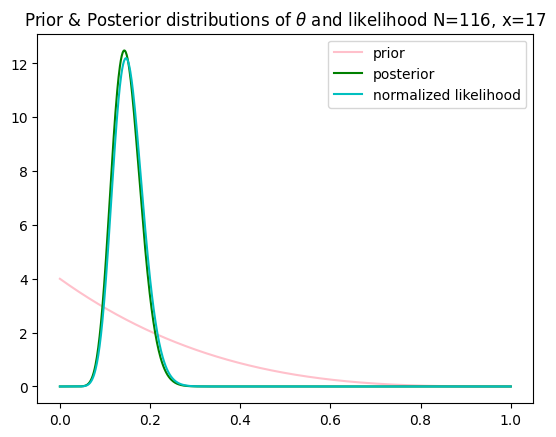

In [ ]:
N = 116 # Number of trials
x = 17 # Number of successes
# Prior params
alpha_prior = 1
beta_prior = 4
# Posterior params
alpha_post = alpha_prior + x
beta_post = beta_prior + N - x


# define linspace of theta parameter
theta = np.linspace(0, 1, 1000)
# define pdf for prior and posterior distr
prior_distr = beta.pdf(theta, alpha_prior, beta_prior)
posterior_distr = beta.pdf(theta, alpha_post, beta_post)

# likelihood is a binomial, the Area of (theta)^17(1-theta)^99 is B(18, 100)
# We also have to divide by the common combination term
normalized_likelihood = binom.pmf(x, N, theta) / math.comb(N,x) / scipy.special.beta(x + 1, N-x+1) 

# plot graphs
plt.plot(theta, prior_distr, color='pink', label='prior')
plt.plot(theta, posterior_distr, color='green', label='posterior')
plt.plot(theta, normalized_likelihood, color='c', label='normalized likelihood')
plt.title(r"Prior & Posterior distributions of $\theta$ and likelihood N=116, x=17")
plt.legend()
plt.show()

### Point 5

Find the posterior probability that θ < 0.1

In [ ]:
# collect the result of cumulative distribution function of 0.1
print(f"Posterior probability is {beta.cdf(0.1, alpha_post, beta_post)}")

Posterior probability is 0.053094376993042654


### Point 6

Find a central 95% posterior credible interval for θ

In [ ]:
# to find the central credible interval of 95%, we cut 2.5% of values from each side via the percentile function
l_interval, r_interval = scipy.stats.beta.ppf(0.025, alpha_post, beta_post), scipy.stats.beta.ppf(0.975, alpha_post, beta_post)
print(f"Central 95% posterior credible interval is ({l_interval}, {r_interval})")

Central 95% posterior credible interval is (0.09138957252823, 0.21710689824337648)


## Task2 

In [ ]:
# install for converting coordinates
! pip install pyproj

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import random

### Dataset

In [ ]:
# read the dataset
cities = pd.read_csv("city.csv")
cities

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


In [ ]:
# select 30 most populated cities in Russia
top_cities = cities.sort_values("population", ascending=False).head(30)
select_columns = ["geo_lat","geo_lon", "address", "population"]
# reset index (used as a city id as well)
top_cities = top_cities[select_columns].rename(columns={"address":"city"}).reset_index().drop(columns=['index'])

In [ ]:
from pyproj import Transformer
# get x and y coordinate for each of the selected cities
def latlon_to_xy(x, y):

    project = Transformer.from_crs("epsg:4326", "epsg:3296").transform
    return project(x, y)

top_cities["x"] = top_cities.apply(lambda x : -latlon_to_xy(x['geo_lat'], x['geo_lon'])[0], axis = 1)
top_cities["y"] = top_cities.apply(lambda x : -latlon_to_xy(x['geo_lat'], x['geo_lon'])[1], axis = 1)

In [ ]:
# cities ids ordered (i.e in index order)
cities_order = np.array(top_cities.index)
cities_order

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

### Algorithm

In [ ]:
# calculate euclidian distance between 2 points
def euclidian_distance(x1,y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# get initial random path
def get_x0_path(path):
  p = path.copy()
  random.shuffle(p)
  return p

# get a neighbouring path by switching 2 cities
def get_neighbour(path):
  seq = path.copy()
  idx = range(len(seq))
  i1, i2 = random.sample(idx, 2)
  seq[i1], seq[i2] = seq[i2], seq[i1]
  return seq

# calculate total path distance
def calc_path_distance(path):
  total_length = 0
  N = len(path)
  # for each city pair, calculate the distance and add it to the total sum
  for i in range(N):
    
    city1, city2 = path[i], path[(i+1)%N]

    x1, y1 = top_cities.iloc[city1][["x", "y"]]
    x2, y2 = top_cities.iloc[city2][["x", "y"]]

    total_length += euclidian_distance(x1, y1, x2, y2)
  # division to deal with overflow 
  return total_length // 1e3
# calculate the exp cost, that is used for acceptance ratio calculation
def calc_path_cost(path, T):
  return np.exp(-calc_path_distance(path)/T)
# reduce temperature based on coefficient k
def reduce_t(T, k):
  return T*(k)

In [323]:
# Main Annealing function
def annealing(cities_order, T_init, k):
  # get initial path and calculate its cost
  x_t = get_x0_path(cities_order)
  T = T_init
  old_cost = calc_path_cost(x_t, T)
  cur_dist = calc_path_distance(x_t)
  it = 1
  # Print initial metrics
  print(f"Initially the cost is: {cur_dist}, T={T}")
  # Save metrics
  temperatures, samples, costs = [T], [x_t], [cur_dist]
  # I chose 450 iterations, as they are suffient to make each annealing speed stop to change states
  while it < 451:
    # get a neighbour
    x_prime = get_neighbour(x_t)
    # calculate new exp cost
    new_cost = calc_path_cost(x_prime, T)
    alpha = new_cost/old_cost
    u = np.random.uniform()

    # accept and update state/cost or keep the same state
    if (u < alpha): 
      x_t = x_prime
      old_cost = new_cost
    # calc distance of a new (or old) sample
    cur_dist = calc_path_distance(x_t)
    if it % 10 == 0:
      print(f"The cost at iteration {it}: {cur_dist}, T={T}")
    # reduce temperature
    T = reduce_t(T, k)
    
    temperatures.append(T)
    samples.append(x_t)
    costs.append(cur_dist)
    # increase iteration
    it+=1
  
  return temperatures, samples, costs

In [324]:
temperatures_S, samples_S, costs_S = annealing(cities_order, 60000, 0.99)

Initially the cost is: 75068.0, T=60000
The cost at iteration 10: 68638.0, T=54811.03484901846
The cost at iteration 20: 72649.0, T=49570.117430135215
The cost at iteration 30: 61006.0, T=44830.325659895796
The cost at iteration 40: 60323.0, T=40543.742943617006
The cost at iteration 50: 68998.0, T=36667.034371971924
The cost at iteration 60: 75674.0, T=33161.00862974312
The cost at iteration 70: 77383.0, T=29990.221793951947
The cost at iteration 80: 71394.0, T=27122.619015988526
The cost at iteration 90: 72120.0, T=24529.210465352957
The cost at iteration 100: 62959.0, T=22183.778258983588
The cost at iteration 110: 64523.0, T=20062.61141339478
The cost at iteration 120: 65243.0, T=18144.2661401413
The cost at iteration 130: 62489.0, T=16409.349061332974
The cost at iteration 140: 65866.0, T=14840.32115363209
The cost at iteration 150: 72037.0, T=13421.320438718845
The cost at iteration 160: 70711.0, T=12138.001627726628
The cost at iteration 170: 66561.0, T=10977.391098543654
The co

In [325]:
temperatures_M, samples_M, costs_M = annealing(cities_order, 60000, 0.98)

Initially the cost is: 66408.0, T=60000
The cost at iteration 10: 68336.0, T=50024.865727808996
The cost at iteration 20: 60059.0, T=40873.95745439354
The cost at iteration 30: 69581.0, T=33396.99914586348
The cost at iteration 40: 61537.0, T=27287.77983373168
The cost at iteration 50: 57153.0, T=22296.10286247654
The cost at iteration 60: 58259.0, T=18217.539348497172
The cost at iteration 70: 56399.0, T=14885.056010060916
The cost at iteration 80: 60550.0, T=12162.174494818822
The cost at iteration 90: 58957.0, T=9937.382052337747
The cost at iteration 100: 63898.0, T=8119.564646617532
The cost at iteration 110: 60779.0, T=6634.275476516678
The cost at iteration 120: 64486.0, T=5420.6860852627
The cost at iteration 130: 58582.0, T=4429.095194941862
The cost at iteration 140: 58582.0, T=3618.893242903293
The cost at iteration 150: 58582.0, T=2956.89925980537
The cost at iteration 160: 58582.0, T=2416.0019778928827
The cost at iteration 170: 58582.0, T=1974.0495175228016
The cost at it

In [326]:
temperatures_F, samples_F, costs_F = annealing(cities_order, 60000, 0.965)

Initially the cost is: 66512.0, T=60000
The cost at iteration 10: 61690.0, T=43540.866786722145
The cost at iteration 20: 67554.0, T=30490.89721200359
The cost at iteration 30: 67917.0, T=21352.23484059073
The cost at iteration 40: 64328.0, T=14952.591572420231
The cost at iteration 50: 61870.0, T=10471.034830817132
The cost at iteration 60: 60241.0, T=7332.680084061093
The cost at iteration 70: 60241.0, T=5134.945884903551
The cost at iteration 80: 60241.0, T=3595.9115819334356
The cost at iteration 90: 60241.0, T=2518.15314024987
The cost at iteration 100: 60241.0, T=1763.4180077199853
The cost at iteration 110: 60241.0, T=1234.8903727287056
The cost at iteration 120: 60241.0, T=864.7718385442452
The cost at iteration 130: 60241.0, T=605.5843897193338
The cost at iteration 140: 60241.0, T=424.080013624281
The cost at iteration 150: 60241.0, T=296.97571636369526
The cost at iteration 160: 60241.0, T=207.96683002341877
The cost at iteration 170: 60241.0, T=145.6354846772139
The cost at

### Analysis

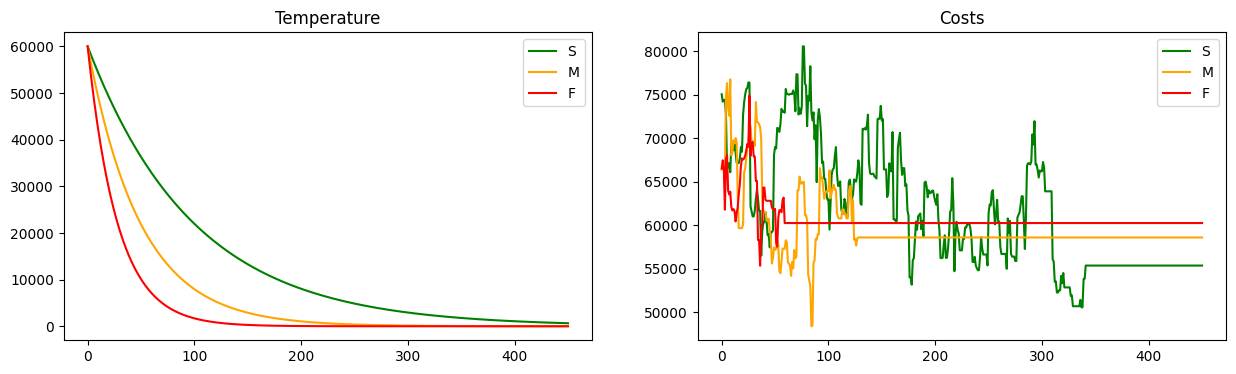

In [327]:
from matplotlib import pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(15,4))

# Temperatures
axes[0].plot(temperatures_S, label="S", color="green")
axes[0].plot(temperatures_M, label="M", color="orange")
axes[0].plot(temperatures_F, label="F", color="red")
axes[0].set_title("Temperature")

axes[0].legend()

# Costs
axes[1].plot(costs_S, label="S", color="green")
axes[1].plot(costs_M, label="M", color="orange")
axes[1].plot(costs_F, label="F", color="red")
axes[1].set_title("Costs")

axes[1].legend()
plt.show()

### Report

3 types of temperature decrease were taken: Fast $(F)$, Medium $(M)$, Slow $(S)$. For temperature descrease I used a formula:
$$
T=T_0*\alpha^k
$$
where $k$ is the iteration number and $\alpha$ is the cooling coefficient
$$
0.99, 0.98, 0.965 
$$
respectively for Slow $(S)$, Medium $(M)$, Fast $(F)$.

As you can see, the speed of cooling negatively affects the convergence to optimal solution, yet the fastest cooling has the fastest convegence time. (Refer to the cost plot) This behaviour is similar to atoms in metal, that are distributed in a more unoptimized manner if heated metal was cooled down too fast. Here is the same, the faster we descrese the temperature, the less "motion" and chance to jump to another (and more) optimal state. As a result, we are stuck in a less optimal state. Unlike dast cooling, slow temperature decrease converges slower, yet explores larger sample space to try out.

### Visualisation

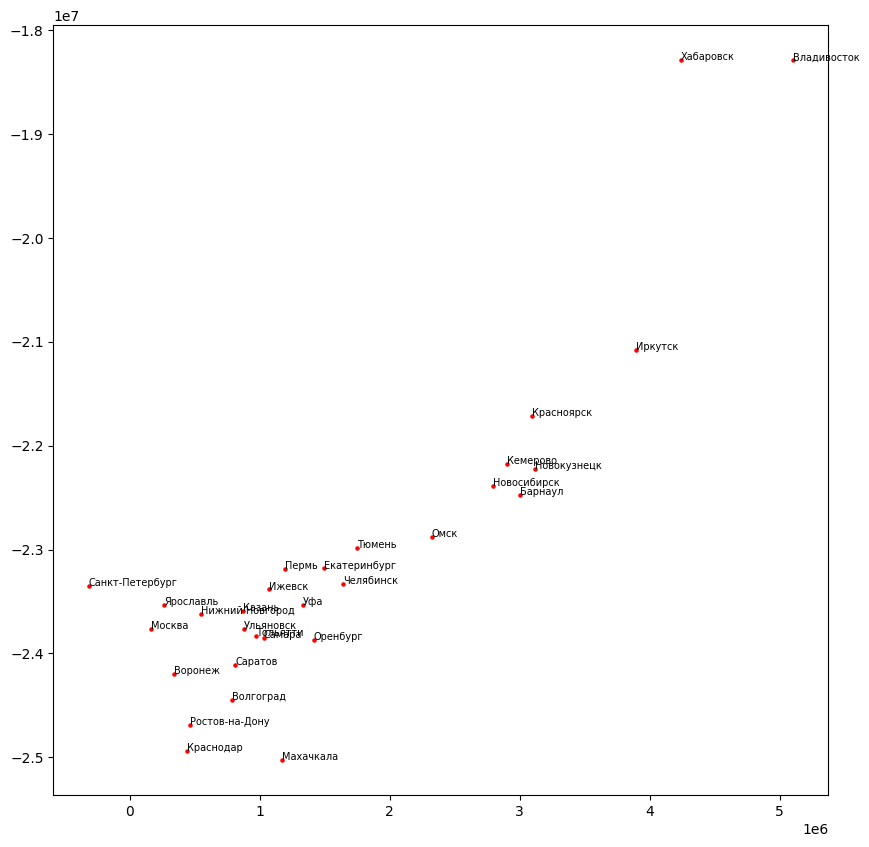

In [ ]:
# we can plot the cities and their names
y = top_cities["y"]
x = top_cities["x"]
n = top_cities["city"]
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=5, color="red")
for i, txt in enumerate(n):
    plt.annotate(txt.split("г ",1)[1], (x[i], y[i]), fontsize=7)
    
plt.show()

In [ ]:
# import matplotlib animation library
from matplotlib.animation import FuncAnimation

# function that animates the process of path search
def animate_annealing(samples, costs, temperatures, mode, color):

  # plot points and names (they remain static and we do not need to change them)
  y = top_cities["y"]
  x = top_cities["x"]
  n = top_cities["city"]

  fig = plt.figure(figsize=(10,10))
  ax = plt.axes()
  ax.scatter(x, y, s=5, color="red")

  for i, txt in enumerate(n):
      ax.annotate(txt.split("г ",1)[1], (x[i], y[i]), fontsize=7)

  # function that outputs segment coordintates if it exists in the path (or graph)
  def return_lines(path):
    N = len(path)
    segments = []
    for i in range(N):
      # for each adjacent city
      city1, city2 = path[i], path[(i+1)%N]
      # collect coordinates
      x1, y1 = top_cities.iloc[city1][["x", "y"]]
      x2, y2 = top_cities.iloc[city2][["x", "y"]]
      # aff to the segments
      segments.append((x1, x2))
      segments.append((y1, y2))
    
    return segments 
  # get initial segments
  lines = return_lines(samples[0])
  # place segments and cost function tableau
  root = ax.plot(*lines, color=color)
  label = ax.text(4*1e6,-2.4*1e7," ",fontsize=10)


  def init():
      for i in range(len(root)):
        root[i].set_data(*lines[2*i:2*i+2])
      return root

  def animate(i):
      # each animation frame, plot new segments from the history of annealing algothims (we saved these before)
      new_lines = return_lines(samples[i])
      for j in range(len(root)):
        root[j].set_data(*new_lines[2*j:2*j+2])
      # change metrics tables
      label.set_text(f"Annealing: {mode}\nCost: {np.round(costs[i],4)}\nTemp: {np.round(temperatures[i],2)}")
      return root

  anim = FuncAnimation(fig, animate, init_func=init,
                                frames=len(samples), interval=20, repeat=False, blit=True)

  # save animation as mp4 video (will be available in github)
  anim.save(f'anim_{mode}.mp4')

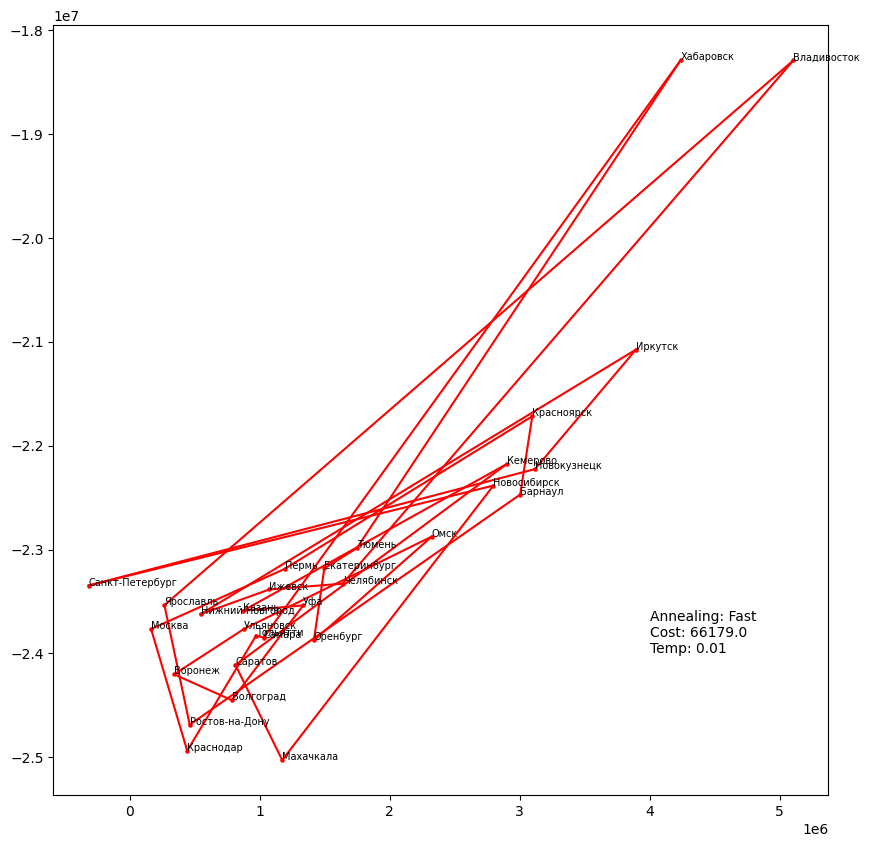

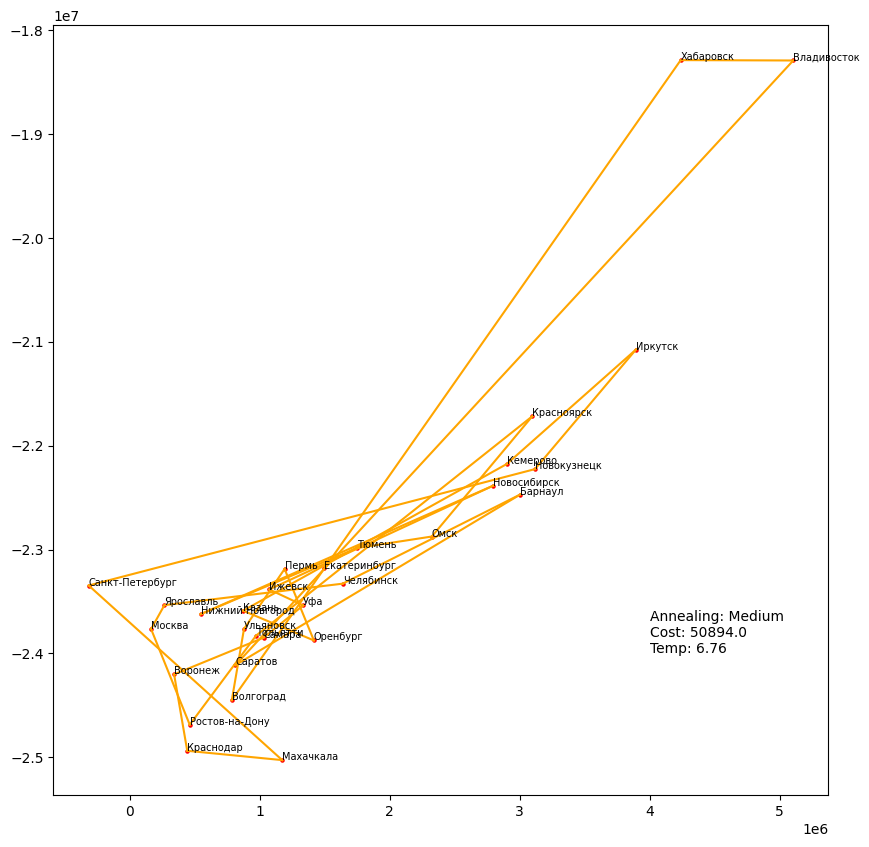

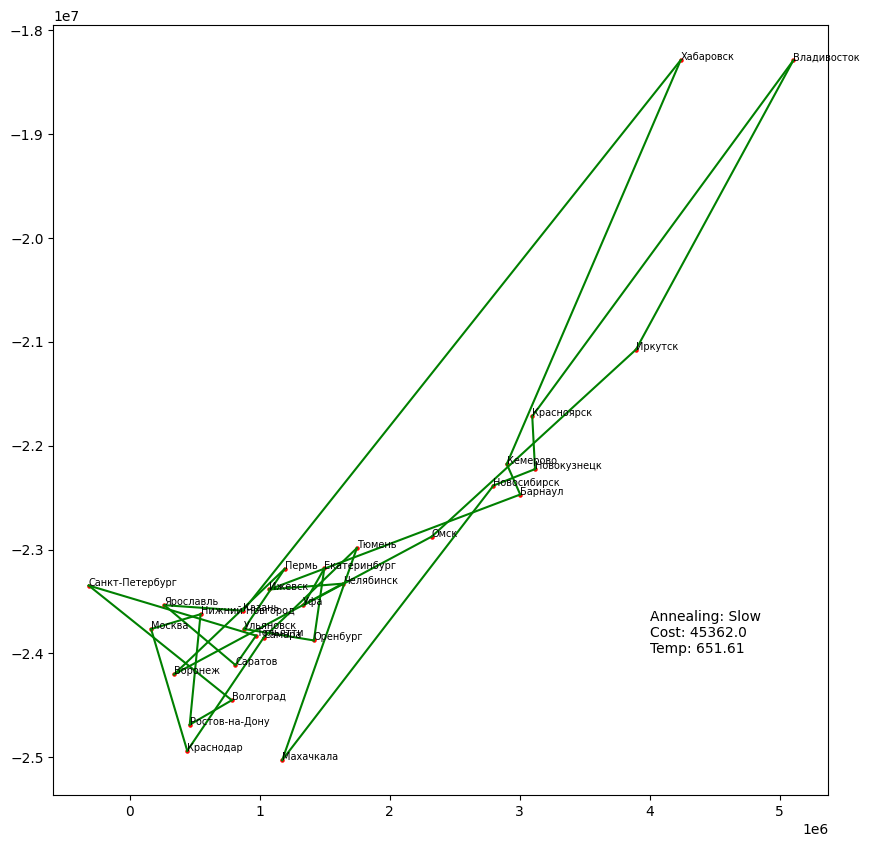

In [ ]:
# call functions + output last frame/state
animate_annealing(samples_F, costs_F, temperatures_F, "Fast", "red")
animate_annealing(samples_M, costs_M, temperatures_M, "Medium", "orange")
animate_annealing(samples_S, costs_S, temperatures_S, "Slow", "green")